In [1]:
import os
import subprocess
import sys
sys.path.append('..')
from tools.formating.formating import *
from tools.utils.datasplit import *
from tools.qc.scanpy_qc import *
import numpy as np
import scipy

R[write to console]: Loading required package: SingleCellExperiment

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowC


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: Attaching SeuratObject

R[write to console]: Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

R[write to console]: 
Attaching package: ‘Seurat’


R[write to console]: The following object is masked from ‘package:SummarizedExperiment’:

    Assays


R[write to console]: Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

R[write to console]: Signac built for for SeuratObject v4 was just loaded with SeuratObject
v5; disabling v5 assays and validation routines, and ensuring assays
work in strict v3/v4 compatibility mode

R[write to console]: 
Attaching package: ‘Matrix’


R[write to console]: The following object is masked from ‘package:S4Vectors’:

    expand




scanpy==1.9.5 anndata==0.9.2 umap==0.5.4 numpy==1.22.4 scipy==1.9.1 pandas==1.3.5 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.10


In [2]:
# input = "/ps/ai-ready/data/Clustering/Tabula_Sapiens/TS_germ line.h5ad"
# input = "/ps/ai-ready/data/Clustering/Tabula_Muris/droplet_Bladder_seurat_tiss.h5ad"
# input = "/ps/ai-ready/data/error/droplet_Bladder_seurat_tiss_qc_result.h5ad"
# input = "/ps/ai-ready/data/Clustering/Tabula_Sapiens/TS_Skin.h5ad"
# input = "/ps/ai-ready/data/error/droplet_Bladder_seurat_tiss.h5seurat"
# input = "/ps/ai-ready/data/error/tung.rds"
# input = "/ps/data/results/facs Heart_Seurat.h5ad"
input = "/ps/ai-ready/data/error/droplet_Bladder_seurat_tiss.Robj"
adata = load_anndata(input)
adata

/ps/ai-ready/data/error/droplet_Bladder_seurat_tiss.Robj
convert_seurat_sce_to_anndata
RNA
[1] "Inside ConvertSeuratSCEtoAnndata R function"


R[write to console]: Updating from v2.X to v3.X

R[write to console]: Validating object structure

R[write to console]: Updating object slots

R[write to console]: Ensuring keys are in the proper structure

R[write to console]: Updating matrix keys for DimReduc ‘pca’

R[write to console]: Updating matrix keys for DimReduc ‘tsne’

R[write to console]: Ensuring keys are in the proper structure

R[write to console]: Ensuring feature names don't have underscores or pipes

R[write to console]: Updating slots in RNA

R[write to console]: Updating slots in pca

R[write to console]: Updating slots in tsne

R[write to console]: Setting tsne DimReduc to global

R[write to console]: Validating object structure for Assay ‘RNA’

R[write to console]: Validating object structure for DimReduc ‘pca’

R[write to console]: Validating object structure for DimReduc ‘tsne’

R[write to console]: Object representation is consistent with the most current Seurat version



[1] "srat object is loaded"


AnnData object with n_obs × n_vars = 2500 × 23341
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id'
    var: 'name'

In [3]:
adata.obs

orig.ident  n_counts  n_genes   channel   tissue  \
10X_P4_3_AAAGTAGAGATGCCAG        10X   10291.0     2853  10X_P4_3  Bladder   
10X_P4_3_AACCGCGTCCAACCAA        10X   17520.0     4194  10X_P4_3  Bladder   
10X_P4_3_AACTCCCGTCGGGTCT        10X   12944.0     3347  10X_P4_3  Bladder   
10X_P4_3_AACTCTTAGTTGCAGG        10X   19594.0     3851  10X_P4_3  Bladder   
10X_P4_3_AACTCTTTCATAACCG        10X   14594.0     3809  10X_P4_3  Bladder   
...                              ...       ...      ...       ...      ...   
10X_P7_7_TTGTAGGTCATGTAGC        10X   22993.0     4296  10X_P7_7  Bladder   
10X_P7_7_TTTACTGGTGTTGAGG        10X    8753.0     3005  10X_P7_7  Bladder   
10X_P7_7_TTTCCTCCATACCATG        10X   14665.0     3778  10X_P7_7  Bladder   
10X_P7_7_TTTGTCAGTTACCGAT        10X   30363.0     4786  10X_P7_7  Bladder   
10X_P7_7_TTTGTCATCTGTGCAA        10X   16524.0     3979  10X_P7_7  Bladder   

                          subtissue mouse.sex mouse.id  percent.ercc  \
10X_P4_3_AAAGTAGAGATGCCAG                   M    3-M-8           0.0   
10X_P4_3_AACCGCGTCCAACCAA                   M    3-M-8           0.0   
10X_P4_3_AACTCCCGTCGGGTCT                   M    3-M-8           0.0   
10X_P4_3_AACTCTTAGTTGCAGG                   M    3-M-8           0.0   
10X_P4_3_AACTCTTTCATAACCG                   M    3-M-8           0.0   
...                             ...       ...      ...           ...   
10X_P7_7_TTGTAGGTCATGTAGC                   F   3-F-56           0.0   
10X_P7_7_TTTACTGGTGTTGAGG                   F   3-F-56           0.0   
10X_P7_7_TTTCCTCCATACCATG                   F   3-F-56           0.0   
10X_P7_7_TTTGTCAGTTACCGAT                   F   3-F-56           0.0   
10X_P7_7_TTTGTCATCTGTGCAA                   F   3-F-56           0.0   

                           percent.ribo                  free_annotation  \
10X_P4_3_AAAGTAGAGATGCCAG      0.219609         Bladder mesenchymal cell   
10X_P4_3_AACCGCGTCCAACCAA      0.176712         Bladder mesenchymal cell   
10X_P4_3_AACTCCCGTCGGGTCT      0.192444         Bladder mesenchymal cell   
10X_P4_3_AACTCTTAGTTGCAGG      0.356385  Luminal bladder epithelial cell   
10X_P4_3_AACTCTTTCATAACCG      0.157119         Bladder mesenchymal cell   
...                                 ...                              ...   
10X_P7_7_TTGTAGGTCATGTAGC      0.286783    Basal bladder epithelial cell   
10X_P7_7_TTTACTGGTGTTGAGG      0.120873         Bladder mesenchymal cell   
10X_P7_7_TTTCCTCCATACCATG      0.118173         Bladder mesenchymal cell   
10X_P7_7_TTTGTCAGTTACCGAT      0.307018    Basal bladder epithelial cell   
10X_P7_7_TTTGTCATCTGTGCAA      0.299504    Basal bladder epithelial cell   

                               cell_ontology_class res.0.4  \
10X_P4_3_AAAGTAGAGATGCCAG             bladder cell       0   
10X_P4_3_AACCGCGTCCAACCAA             bladder cell       2   
10X_P4_3_AACTCCCGTCGGGTCT             bladder cell       5   
10X_P4_3_AACTCTTAGTTGCAGG  bladder urothelial cell       3   
10X_P4_3_AACTCTTTCATAACCG             bladder cell       2   
...                                            ...     ...   
10X_P7_7_TTGTAGGTCATGTAGC  bladder urothelial cell       1   
10X_P7_7_TTTACTGGTGTTGAGG             bladder cell       5   
10X_P7_7_TTTCCTCCATACCATG             bladder cell       5   
10X_P7_7_TTTGTCAGTTACCGAT  bladder urothelial cell       1   
10X_P7_7_TTTGTCATCTGTGCAA  bladder urothelial cell       1   

                          previous_free_annotation  \
10X_P4_3_AAAGTAGAGATGCCAG                       NA   
10X_P4_3_AACCGCGTCCAACCAA                       NA   
10X_P4_3_AACTCCCGTCGGGTCT                       NA   
10X_P4_3_AACTCTTAGTTGCAGG                       NA   
10X_P4_3_AACTCTTTCATAACCG                       NA   
...                                            ...   
10X_P7_7_TTGTAGGTCATGTAGC                       NA   
10X_P7_7_TTTACTGGTGTTGAGG                       NA   
10X_P7_7_TTTCCTCCATACCATG                       NA   
10X_P7_7_TTTGTCAGTTACCGAT 

In [4]:
cell_metadata, cell_metadata_head, obs_names, nCells, nGenes, layers, info, adata_size, embeddings = get_cell_metadata(adata)

In [5]:
cell_metadata_head

{'n_counts': {'10X_P4_3_AAAGTAGAGATGCCAG': 10291.0,
  '10X_P4_3_AACCGCGTCCAACCAA': 17520.0,
  '10X_P4_3_AACTCCCGTCGGGTCT': 12944.0,
  '10X_P4_3_AACTCTTAGTTGCAGG': 19594.0,
  '10X_P4_3_AACTCTTTCATAACCG': 14594.0},
 'n_genes': {'10X_P4_3_AAAGTAGAGATGCCAG': 2853,
  '10X_P4_3_AACCGCGTCCAACCAA': 4194,
  '10X_P4_3_AACTCCCGTCGGGTCT': 3347,
  '10X_P4_3_AACTCTTAGTTGCAGG': 3851,
  '10X_P4_3_AACTCTTTCATAACCG': 3809},
 'channel': {'10X_P4_3_AAAGTAGAGATGCCAG': '10X_P4_3',
  '10X_P4_3_AACCGCGTCCAACCAA': '10X_P4_3',
  '10X_P4_3_AACTCCCGTCGGGTCT': '10X_P4_3',
  '10X_P4_3_AACTCTTAGTTGCAGG': '10X_P4_3',
  '10X_P4_3_AACTCTTTCATAACCG': '10X_P4_3'},
 'mouse.sex': {'10X_P4_3_AAAGTAGAGATGCCAG': 'M',
  '10X_P4_3_AACCGCGTCCAACCAA': 'M',
  '10X_P4_3_AACTCCCGTCGGGTCT': 'M',
  '10X_P4_3_AACTCTTAGTTGCAGG': 'M',
  '10X_P4_3_AACTCTTTCATAACCG': 'M'},
 'mouse.id': {'10X_P4_3_AAAGTAGAGATGCCAG': '3-M-8',
  '10X_P4_3_AACCGCGTCCAACCAA': '3-M-8',
  '10X_P4_3_AACTCCCGTCGGGTCT': '3-M-8',
  '10X_P4_3_AACTCTTAGTTGCAGG': '3-M-8

In [7]:
adata.obsm['X_umap_3D'].shape

(4016, 3)

In [8]:
adata.obsm['X_umap'].shape

(4016, 2)

In [4]:
adata.obs.columns.values.tolist()

['orig.ident',
 'n_counts',
 'n_genes',
 'channel',
 'tissue',
 'subtissue',
 'mouse.sex',
 'mouse.id',
 'percent.ercc',
 'percent.ribo',
 'free_annotation',
 'cell_ontology_class',
 'res.0.4',
 'previous_free_annotation',
 'previous_cell_ontology_class',
 'cluster.ids',
 'cell_ontology_id',
 'pct_counts_mt',
 'pct_counts_rb',
 'pct_counts_hb',
 'percent.plat',
 'RNA_snn_res.0.5',
 'seurat_clusters',
 'doublet_score',
 'doublet_class']

In [5]:
adata.obs.to_dict()

{'orig.ident': {'10X_P4_3_AAAGTAGAGATGCCAG': '10X',
  '10X_P4_3_AACTCCCGTCGGGTCT': '10X',
  '10X_P4_3_AACTCTTAGTTGCAGG': '10X',
  '10X_P4_3_AACTCTTTCATAACCG': '10X',
  '10X_P4_3_AAGACCTAGATCCGAG': '10X',
  '10X_P4_3_AAGGAGCGTGCAACTT': '10X',
  '10X_P4_3_AAGTCTGAGATAGTCA': '10X',
  '10X_P4_3_ACAGCTATCATACGGT': '10X',
  '10X_P4_3_ACATACGCAGCTCCGA': '10X',
  '10X_P4_3_ACCAGTACACGTCTCT': '10X',
  '10X_P4_3_ACGAGCCAGATAGCAT': '10X',
  '10X_P4_3_ACGGAGATCGGAATCT': '10X',
  '10X_P4_3_ACGGGCTGTCTGATCA': '10X',
  '10X_P4_3_ACTGAACCATCCGGGT': '10X',
  '10X_P4_3_ACTTTCAAGATGGGTC': '10X',
  '10X_P4_3_AGACGTTTCTTACCGC': '10X',
  '10X_P4_3_AGCGGTCTCTGAGTGT': '10X',
  '10X_P4_3_AGCTTGAAGACTAAGT': '10X',
  '10X_P4_3_AGGGAGTCAATCGGTT': '10X',
  '10X_P4_3_AGGGATGAGTCGCCGT': '10X',
  '10X_P4_3_AGGTCCGAGGACACCA': '10X',
  '10X_P4_3_AGTCTTTAGCTAGTGG': '10X',
  '10X_P4_3_AGTGAGGAGTGTACTC': '10X',
  '10X_P4_3_AGTGTCACAGTATCTG': '10X',
  '10X_P4_3_ATTATCCAGTAAGTAC': '10X',
  '10X_P4_3_ATTTCTGCATGTTGAC': '10X'

In [7]:
len(adata.obs.to_json())

2150601

In [7]:
adata.obsm['X_umap'].shape

(3961, 2)

In [6]:
df = pd.DataFrame.sparse.from_spmatrix(adata.X, index=None, columns=None)
df

0     1     2     3     4     5     6     7     8     9     ...  1990  \
0      3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  10.0   
1      2.0   1.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   6.0   
2      1.0   1.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      4.0   1.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   6.0   
4      2.0   2.0   4.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   2.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2295   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2296   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   3.0   
2297   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   
2298   0.0   0.0   0.0   0.0   2.0   2.0   0.0   0.0   0.0   0.0  ...   4.0   
2299   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      1991  1992  1993  1994  1995  1996  1997  1998  1999  
0      1.0   0.0   1.0   2.0   0.0   0.0   4.0   0.0   0.0  
1      0.0   0.0   0.0   1.0   0.0   1.0   3.0   0.0   0.0  
2      2.0   0.0   2.0   0.0   1.0   0.0   0.0   1.0   0.0  
3      0.0   0.0   0.0   5.0   0.0   0.0   5.0   0.0   0.0  
4      2.0   0.0   3.0   0.0   3.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2295   0.0   2.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  
2296   0.0   0.0   4.0   0.0   0.0   0.0   0.0   2.0   1.0  
2297   1.0   0.0   0.0   1.0   0.0   3.0   7.0   0.0   0.0  
2298   0.0   0.0   0.0   5.0   1.0   0.0   8.0   0.0   0.0  
2299   0.0   0.0   3.0   0.0   1.0   0.0   0.0   2.0   0.0  

[2300 rows x 2000 columns]

In [ ]:
# Convert Seurat/Single-Cell Experiment object to Anndata object and return the path of Anndata object
def convert_seurat_sce_to_anndata1(path, assay='RNA'):
    import rpy2.rinterface_lib.callbacks as rcb
    import rpy2.robjects as ro
    import anndata2ri
    from rpy2.robjects.packages import importr
    from rpy2.robjects import pandas2ri
    from rpy2.robjects.conversion import localconverter
    
    rcb.logger.setLevel(logging.ERROR)
    ro.pandas2ri.activate()
    anndata2ri.activate()

    # Defining the R script and loading the instance in Python
    ro.r['source'](os.path.abspath("../tools/formating/formating.R"))
    # Access the loaded R functions
    ConvertSeuratSCEtoAnndata_r = ro.globalenv['ConvertSeuratSCEtoAnndata']

    assay_names = None
    adata_path = None
    results = None

    if path.endswith(".h5Seurat") or path.endswith(".h5seurat") or path.endswith(".rds") or path.endswith(".Robj"):
        results = ConvertSeuratSCEtoAnndata_r(path, assay=assay)
        print(results)
        adata_path = str(results.rx2('anndata_path'))
        # adata_path = list(results[2])[0]
        assay_names = list(results[1])
    
    return results

In [ ]:
results = convert_seurat_sce_to_anndata1(input)
results

In [ ]:
type(results)

In [ ]:
from collections import OrderedDict

results = OrderedDict(results)

In [ ]:
results['anndata_path'][0]

In [3]:
adata, counts, csv_path = load_anndata_to_csv('/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Bladder_Seurat.h5ad', '/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Results/6cedab7f3e03afa514c0c919aafc4abf/Bladder_SAVER_imputation.csv') 

/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Bladder_Seurat.h5ad
AnnData object with n_obs × n_vars = 2300 × 2000
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.1', 'seurat_clusters', 'doublet_score', 'doublet_class'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3D'
    layers: 'scale.data'
    obsp: 'connectivities', 'distances'


In [4]:
csv_path

'/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Results/6cedab7f3e03afa514c0c919aafc4abf/Bladder_SAVER_imputation.csv'

In [6]:
adata is None

False

In [11]:
counts

<2300x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 929713 stored elements in Compressed Sparse Column format>

In [7]:
adata = sc.read_h5ad('/ps/oscb/user_storage/Benchmarks/Bladder_1719590888745/QC/Bladder_Seurat.h5ad')
adata

AnnData object with n_obs × n_vars = 2300 × 2000
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.1', 'seurat_clusters', 'doublet_score', 'doublet_class'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3D'
    layers: 'scale.data'
    obsp: 'connectivities', 'distances'

In [2]:
adata = load_anndata("/usr/src/app/storage/Benchmarks/Bladder_1719590888745/QC/Results/normalized/Bladder_normalization.h5ad")
adata

/usr/src/app/storage/Benchmarks/Bladder_1719590888745/QC/Results/normalized/Bladder_normalization.h5ad


AnnData object with n_obs × n_vars = 2300 × 2000
    obs: 'nCount_SCT', 'nFeature_SCT', 'nCount_logCPM', 'nFeature_logCPM', 'orig.ident', 'n_counts', 'n_genes', 'nCounts_RNA', 'nFeatures_RNA', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.1', 'seurat_clusters', 'doublet_score', 'doublet_class', 'logCP10K_leiden', 'logCP10K_louvain'
    var: 'name'
    uns: 'logCP10K_leiden', 'logCP10K_louvain', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3d', 'logCP10K_pca', 'logCP10K_tsne', 'logCP10K_umap', 'logCP10K_umap_3D'
    layers: 'logCP10K'
    obsp: 'connectivities', 'distances'

In [16]:
adata.X

<2300x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 929713 stored elements in Compressed Sparse Column format>

In [18]:
from scipy import sparse
adata.obsm['logCP10K'] = sparse.csr_matrix(adata.layers['logCP10K'])

<2300x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 929713 stored elements in Compressed Sparse Row format>

In [24]:
adata.layers['logCP10K']

array([[2.64458444, 0.        , 0.        , ..., 2.91434821, 0.        ,
        0.        ],
       [2.12943954, 1.54864192, 0.        , ..., 2.49446316, 0.        ,
        0.        ],
       [1.27759264, 1.27759264, 2.17064959, ..., 0.        , 1.27759264,
        0.        ],
       ...,
       [0.        , 0.        , 1.75997972, ..., 3.54634297, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 3.12123402, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.12390931,
        0.        ]])

In [3]:
adata.obsm["logCP10K_pca"] = sc.pp.pca(adata.layers["logCP10K"])

computing PCA
    with n_comps=50
    finished (0:00:01)


In [8]:
from sklearn.manifold import TSNE
from umap import UMAP

In [9]:
tsne = TSNE(n_components=2, random_state=0)
adata.obsm["logCP10K_tsne"] = tsne.fit_transform(adata.obsm["logCP10K_pca"])

In [10]:
import plotly.express as px
fig = px.scatter(
    adata.obsm["logCP10K_tsne"], x=0, y=1,
    color=adata.obs["cluster.ids"], labels={'color': 'cluster.ids'}
)
fig.show()

In [11]:
umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(adata.obsm["logCP10K_pca"])
proj_3d = umap_3d.fit_transform(adata.obsm["logCP10K_pca"])

In [13]:
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=adata.obs["cluster.ids"], labels={'color': 'cluster.ids'}
)

In [14]:
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=adata.obs["cluster.ids"], labels={'color': 'cluster.ids'}
)

In [15]:
fig_3d.update_traces(marker_size=5)

In [16]:
fig_2d.show()
fig_3d.show()

In [7]:
adata.obsm["logCP10K_tsne"] = sc.tl.tsne(adata.obsm["logCP10K_pca"])

computing tSNE


AttributeError: 'numpy.ndarray' object has no attribute 'n_vars'

In [4]:
adata.obsm['logCP10K'] = adata.layers['logCP10K']
adata.obsm['logCP10K']
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=None, use_rep='logCP10K', random_state=0)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [5]:
# sc.pp.pca(adata, svd_solver='arpack', layer='logCP10K')

TypeError: pca() got an unexpected keyword argument 'layer'

In [28]:
'logCP10K' in adata.layers.keys()

False

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


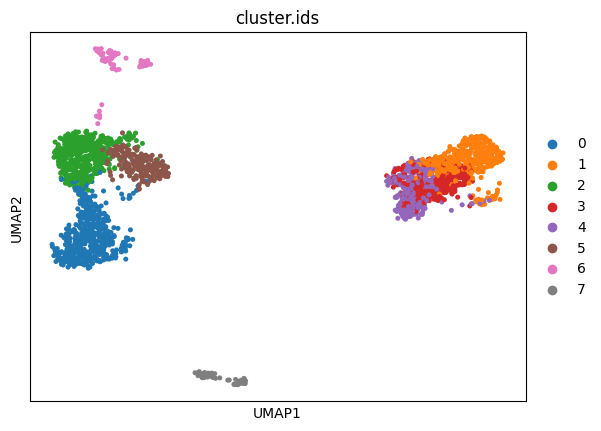

In [6]:
sc.tl.tsne(adata)
sc.tl.umap(adata, random_state=0, 
            init_pos="spectral", n_components=2, 
            copy=False, maxiter=None)
sc.pl.umap(adata, color="cluster.ids")

In [12]:
adata.layers['logCP10K'].shape

(2300, 2000)

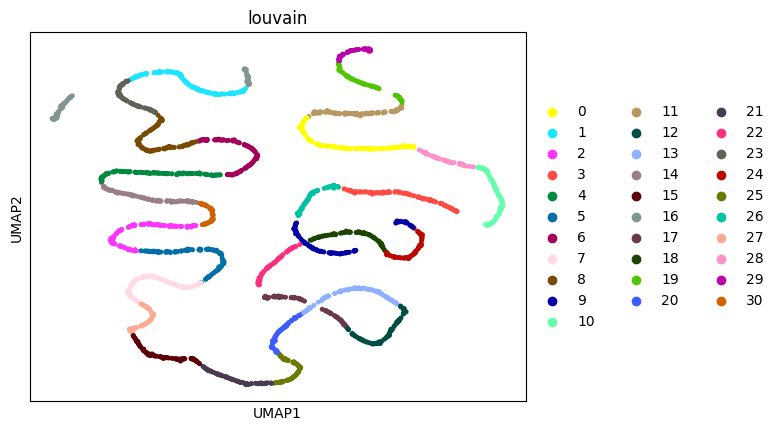

In [5]:
sc.pl.umap(adata, color="louvain")

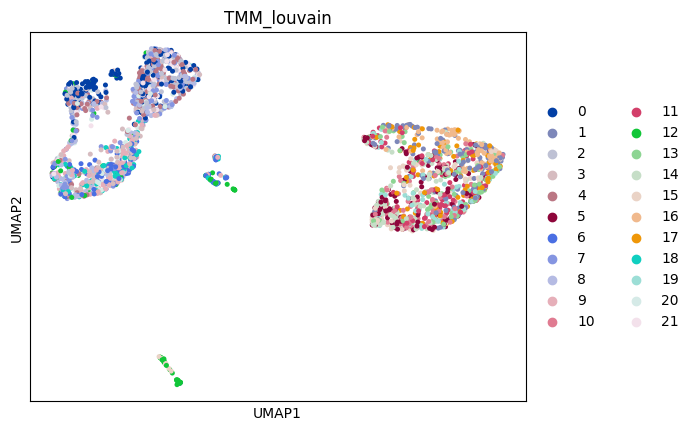

In [6]:
sc.pl.umap(adata, color="TMM_louvain", layer="TMM")

In [5]:
adata.obs

SAVER_leiden SAVER_louvain
10X_P4_3_AAAGTAGAGATGCCAG           22            16
10X_P4_3_AACTCCCGTCGGGTCT           34             3
10X_P4_3_AACTCTTAGTTGCAGG           19            15
10X_P4_3_AACTCTTTCATAACCG           15            18
10X_P4_3_AAGACCTAGGTGGGTT           19            15
...                                ...           ...
10X_P7_7_TTGTAGGCACTTGGAT           38            24
10X_P7_7_TTGTAGGTCATGTAGC           13             6
10X_P7_7_TTTACTGGTGTTGAGG            3            13
10X_P7_7_TTTCCTCCATACCATG           45             0
10X_P7_7_TTTGTCATCTGTGCAA           20            27

[2300 rows x 2 columns]

In [3]:
from tools.visualization.plot import plot_UMAP

umap_plot_3d = plot_UMAP(adata, layer="SAVER", clustering_plot_type="SAVER_leiden", n_dim=3)

[DEBUG] generating new UMAP plot
Ploting 3D UMAP...


In [4]:
umap_plot_3d

'{"data": [{"type": "scatter3d", "x": [-4.590389251708984, -3.18719744682312, -5.214765548706055, -4.73380184173584, -4.92758846282959, -3.8998162746429443, -4.66331148147583, -3.156130313873291, -4.87508487701416, -5.092537879943848, -4.83046817779541, -5.050281524658203, -3.1892287731170654, -5.084712028503418, -5.1922173500061035, -3.3133647441864014, -4.4734721183776855, -5.227365970611572, -5.188385486602783, -4.238032341003418, -5.144351005554199, -3.0114176273345947, -5.026097774505615, -4.0616841316223145, -3.2516026496887207, -4.343137741088867, -3.6676957607269287, -4.776633262634277, -3.201849937438965, -4.144516468048096, -4.493862628936768, -4.964906692504883, -3.6500844955444336, -4.018718242645264, -3.532526731491089, -5.044109344482422, -3.6202235221862793, -4.614030838012695, -3.743220090866089, -4.224905014038086, -4.320715427398682, -4.525289535522461, -3.2875266075134277, -5.029092311859131, -3.474612236022949, -4.0625529289245605, -3.4158220291137695, -5.2396321296

In [7]:
adata

AnnData object with n_obs × n_vars = 2300 × 2000
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.1', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'leiden', 'louvain', 'neighbors', 'pca', 'tsne', 'umap', 'cluster.ids_colors', 'leiden_colors', 'louvain_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3D'
    varm: 'PCs'
    layers: 'scale.data'
    obsp: 'connectivities', 'distances'

In [8]:
sc.pl.umap(adata, color="cluster.ids")